# Base

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import shutil
!gdown 180f8bhHkynsFxqQ91BrSPYhmOwj39wi5

# Set the paths
rar_file_path = '/content/xray_dataset_covid19.zip'
folder_path = '/content/Dataset'
new_dir = '/content/Dataset/mytest'





Downloading...
From: https://drive.google.com/uc?id=180f8bhHkynsFxqQ91BrSPYhmOwj39wi5
To: /content/xray_dataset_covid19.zip
100% 88.4M/88.4M [00:03<00:00, 28.0MB/s]


In [ ]:
import zipfile
import os

with zipfile.ZipFile(rar_file_path, 'r') as zip_ref:
    zip_ref.extractall(folder_path)

# Move the files to the new dataset directory

orig_dir = os.path.join(folder_path, 'xray_dataset_covid19')


In [ ]:
train_dir = os.path.join(orig_dir, 'train')
test_dir = os.path.join(orig_dir, 'test')

## Augmentation
Flipping + rotationg 90, 180 and 270 degreee

In [20]:
import os
import cv2
import random


def augmentation(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through each image in the input folder
    for filename in os.listdir(input_folder):
          if filename.lower().endswith((".jpg", ".png", ".jpeg")):

            original_image = cv2.imread(os.path.join(input_folder, filename))


            flipped_image = cv2.flip(original_image, 1)
            save_path = os.path.join(output_folder, f"flipped_{filename}")

            cv2.imwrite(save_path, flipped_image)

            # Rotate the original image
            for angle in [90, 180, 270]:
                (h, w) = original_image.shape[:2]
                (cX, cY) = (w // 2, h // 2)
                M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
                rotated_image = cv2.warpAffine(original_image, M, (w, h))
                save_path = os.path.join(output_folder, f"rotated_{angle}_{filename}")
                cv2.imwrite(save_path, rotated_image)

# Augmenting for each folder

augmentation(input_folder="/content/Dataset/xray_dataset_covid19/train/COVID", output_folder="/content/Dataset/xray_dataset_covid19/augmented_train/COVID",)
augmentation(input_folder="/content/Dataset/xray_dataset_covid19/train/NORMAL", output_folder="/content/Dataset/xray_dataset_covid19/augmented_train/NORMAL")

tune_dir= "/content/Dataset/xray_dataset_covid19/augmented_train"

In [47]:
import os
import cv2
import random


def augmentation_flip(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through each image in the input folder
    for filename in os.listdir(input_folder):
          if filename.lower().endswith((".jpg", ".png", ".jpeg")):

            original_image = cv2.imread(os.path.join(input_folder, filename))


            flipped_image = cv2.flip(original_image, 1)
            save_path = os.path.join(output_folder, f"flipped_{filename}")

            cv2.imwrite(save_path, flipped_image)



augmentation_flip(input_folder="/content/Dataset/xray_dataset_covid19/train/COVID", output_folder="/content/Dataset/xray_dataset_covid19/augmented_flip_train/COVID",)
augmentation_flip(input_folder="/content/Dataset/xray_dataset_covid19/train/NORMAL", output_folder="/content/Dataset/xray_dataset_covid19/augmented_flip_train/NORMAL")

flip_dir= "/content/Dataset/xray_dataset_covid19/augmented_flip_train"

In [54]:
import os
import cv2
import random


def augmentation_rotate(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through each image in the input folder
    for filename in os.listdir(input_folder):
          if filename.lower().endswith((".jpg", ".png", ".jpeg")):
            original_image = cv2.imread(os.path.join(input_folder, filename))
            # Rotate the original image
            for angle in [90, 180, 270]:
                (h, w) = original_image.shape[:2]
                (cX, cY) = (w // 2, h // 2)
                M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
                rotated_image = cv2.warpAffine(original_image, M, (w, h))
                save_path = os.path.join(output_folder, f"rotated_{angle}_{filename}")
                cv2.imwrite(save_path, rotated_image)



augmentation_rotate(input_folder="/content/Dataset/xray_dataset_covid19/train/COVID", output_folder="/content/Dataset/xray_dataset_covid19/augmented_rot_train/COVID",)
augmentation_rotate(input_folder="/content/Dataset/xray_dataset_covid19/train/NORMAL", output_folder="/content/Dataset/xray_dataset_covid19/augmented_rot_train/NORMAL")

rot_dir= "/content/Dataset/xray_dataset_covid19/augmented_rot_train"

In [53]:
!rm -f /content/Dataset/xray_dataset_covid19/augmented_rot_train/COVID/*

## Plot a sample of each class

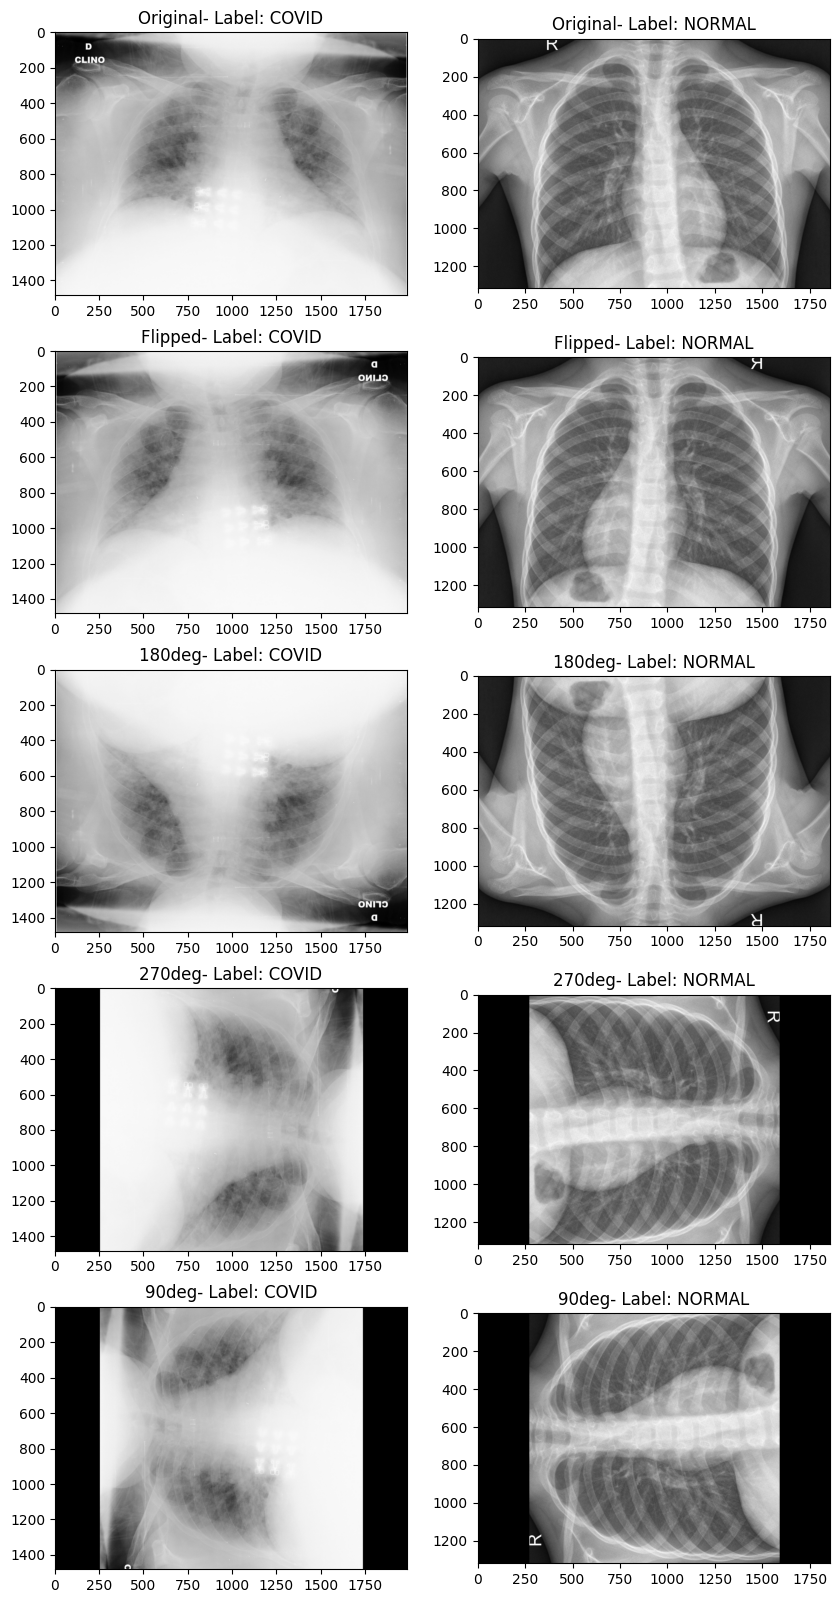

In [59]:
import matplotlib.pyplot as plt
import cv2

# Plotting the first 4 images
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
original_image_covid = cv2.imread('/content/Dataset/xray_dataset_covid19/train/COVID/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')
flipped_covid=cv2.imread("/content/Dataset/xray_dataset_covid19/augmented_flip_train/COVID/flipped_01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg")
rot180_covid= cv2.imread("/content/Dataset/xray_dataset_covid19/augmented_rot_train/COVID/rotated_180_01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg")
rot270_covid= cv2.imread("/content/Dataset/xray_dataset_covid19/augmented_rot_train/COVID/rotated_270_01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg")
rot90_covid= cv2.imread("/content/Dataset/xray_dataset_covid19/augmented_rot_train/COVID/rotated_90_01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg")

original_image_nor = cv2.imread('/content/Dataset/xray_dataset_covid19/train/NORMAL/IM-0001-0001.jpeg')
flipped_nor= cv2.imread("/content/Dataset/xray_dataset_covid19/augmented_flip_train/NORMAL/flipped_IM-0001-0001.jpeg")
rot180_nor=cv2.imread("/content/Dataset/xray_dataset_covid19/augmented_rot_train/NORMAL/rotated_180_IM-0001-0001.jpeg")
rot270_nor=cv2.imread("/content/Dataset/xray_dataset_covid19/augmented_rot_train/NORMAL/rotated_270_IM-0001-0001.jpeg")
rot90_nor=cv2.imread("/content/Dataset/xray_dataset_covid19/augmented_rot_train/NORMAL/rotated_90_IM-0001-0001.jpeg")

axes[0,0].imshow(original_image_covid)
axes[0,0].set_title(f"Original- Label: COVID")
axes[0,1].imshow(original_image_nor)
axes[0,1].set_title(f"Original- Label: NORMAL")

axes[1,0].imshow(flipped_covid)
axes[1,0].set_title(f"Flipped- Label: COVID")
axes[1,1].imshow(flipped_nor)
axes[1,1].set_title(f"Flipped- Label: NORMAL")

axes[2,0].imshow(rot180_covid)
axes[2,0].set_title(f"180deg- Label: COVID")
axes[2,1].imshow(rot180_nor)
axes[2,1].set_title(f"180deg- Label: NORMAL")

axes[3,0].imshow(rot270_covid)
axes[3,0].set_title(f"270deg- Label: COVID")
axes[3,1].imshow(rot270_nor)
axes[3,1].set_title(f"270deg- Label: NORMAL")

axes[4,0].imshow(rot90_covid)
axes[4,0].set_title(f"90deg- Label: COVID")
axes[4,1].imshow(rot90_nor)
axes[4,1].set_title(f"90deg- Label: NORMAL")

plt.show()

## Normalization
By using ImageDataGenerator, data will normalized and resized to 150x150. Also it prepares the data for training.

In [227]:
import tensorflow as tf

img_width, img_height = 150, 150
batch_size = 16
seed = 42
validation_split = 0.2

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    class_names=["COVID", "NORMAL"],
    label_mode='binary',
    seed=seed,
    validation_split=validation_split,
    subset="training",
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    class_names=["COVID", "NORMAL"],
    label_mode='binary',
    seed=seed,
    validation_split=validation_split,
    subset="validation",
)

rot_dataset = tf.keras.utils.image_dataset_from_directory(
    rot_dir,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    class_names=["COVID", "NORMAL"],
    label_mode='binary',
    seed=seed,
    validation_split=validation_split,
    subset="training",
)

rot_validation_dataset = tf.keras.utils.image_dataset_from_directory(
    rot_dir,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    class_names=["COVID", "NORMAL"],
    label_mode='binary',
    seed=seed,
    validation_split=validation_split,
    subset="validation",
)

flip_dataset = tf.keras.utils.image_dataset_from_directory(
    flip_dir,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    class_names=["COVID", "NORMAL"],
    label_mode='binary',
    seed=seed,
    validation_split=validation_split,
    subset="training",
)

flip_validation_dataset = tf.keras.utils.image_dataset_from_directory(
    flip_dir,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    class_names=["COVID", "NORMAL"],
    label_mode='binary',
    seed=seed,
    validation_split=validation_split,
    subset="validation",
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    class_names=["COVID", "NORMAL"],
    label_mode='binary',
    seed=seed,
)

train_datasets = [train_dataset, rot_dataset, flip_dataset]
validation_datasets = [validation_dataset, rot_validation_dataset, flip_validation_dataset]


Found 148 files belonging to 2 classes.
Using 119 files for training.
Found 148 files belonging to 2 classes.
Using 29 files for validation.
Found 444 files belonging to 2 classes.
Using 356 files for training.
Found 444 files belonging to 2 classes.
Using 88 files for validation.
Found 148 files belonging to 2 classes.
Using 119 files for training.
Found 148 files belonging to 2 classes.
Using 29 files for validation.
Found 40 files belonging to 2 classes.


# Classifier

In [228]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

# Create the CNN model
model = Sequential()

# Convolutional Layers
# first layer:
model.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# second layer:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# third layer:
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# forth layer:
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# fifth layer:
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# sixth layer:
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Flatten Layer
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_210 (Conv2D)         (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_210 (MaxPool  (None, 74, 74, 64)        0         
 ing2D)                                                          
                                                                 
 batch_normalization_280 (B  (None, 74, 74, 64)        256       
 atchNormalization)                                              
                                                                 
 dropout_210 (Dropout)       (None, 74, 74, 64)        0         
                                                                 
 conv2d_211 (Conv2D)         (None, 74, 74, 64)        36928     
                                                                 
 max_pooling2d_211 (MaxPool  (None, 37, 37, 64)      

Epoch 1/16
23/23 [==============================] - 12s 208ms/step - loss: 0.9132 - accuracy: 0.7247 - val_loss: 2371.0557 - val_accuracy: 0.4773
Epoch 2/16
23/23 [==============================] - 7s 228ms/step - loss: 0.3119 - accuracy: 0.8652 - val_loss: 36.5868 - val_accuracy: 0.4773
Epoch 3/16
23/23 [==============================] - 6s 195ms/step - loss: 0.2067 - accuracy: 0.9298 - val_loss: 23.2191 - val_accuracy: 0.4659
Epoch 4/16
23/23 [==============================] - 8s 283ms/step - loss: 0.1912 - accuracy: 0.9382 - val_loss: 23.9944 - val_accuracy: 0.4773
Epoch 5/16
23/23 [==============================] - 6s 194ms/step - loss: 0.2492 - accuracy: 0.9045 - val_loss: 4.8964 - val_accuracy: 0.5114
Epoch 6/16
23/23 [==============================] - 7s 224ms/step - loss: 0.1512 - accuracy: 0.9410 - val_loss: 4.6719 - val_accuracy: 0.4659
Epoch 7/16
23/23 [==============================] - 6s 193ms/step - loss: 0.1114 - accuracy: 0.9551 - val_loss: 1.9552 - val_accuracy: 0.5682

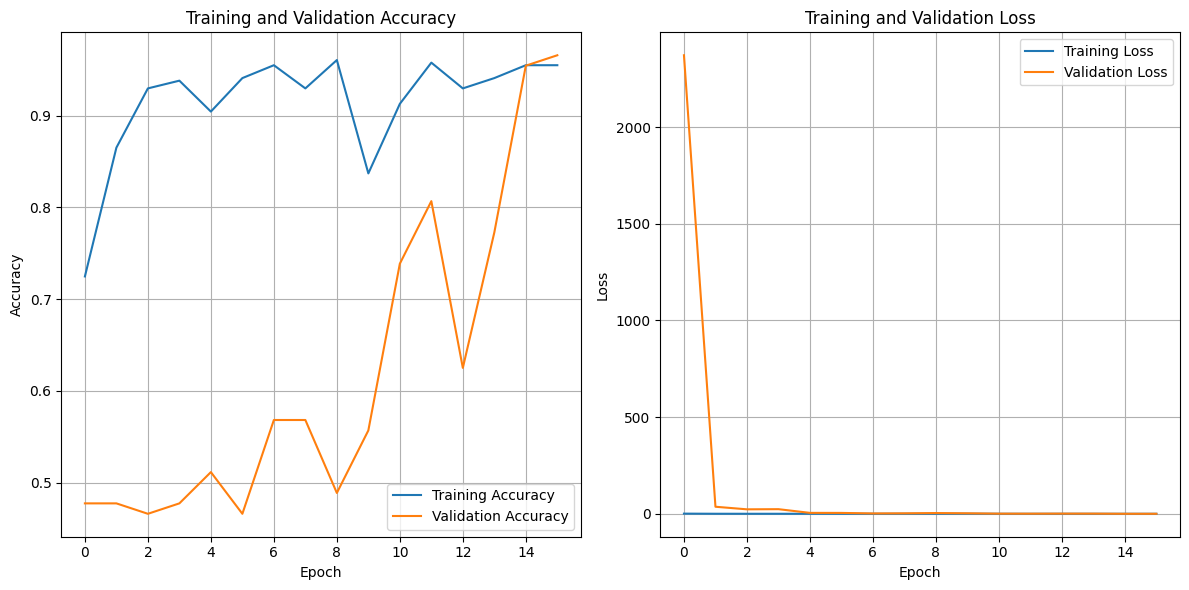

Epoch 1/16
8/8 [==============================] - 7s 161ms/step - loss: 0.5043 - accuracy: 0.8571 - val_loss: 4.2999 - val_accuracy: 0.6897
Epoch 2/16
8/8 [==============================] - 2s 103ms/step - loss: 0.2343 - accuracy: 0.9328 - val_loss: 4.9703 - val_accuracy: 0.6207
Epoch 3/16
8/8 [==============================] - 4s 230ms/step - loss: 0.1314 - accuracy: 0.9412 - val_loss: 1.7596 - val_accuracy: 0.9310
Epoch 4/16
8/8 [==============================] - 2s 130ms/step - loss: 0.0986 - accuracy: 0.9664 - val_loss: 1.0632 - val_accuracy: 0.8966
Epoch 5/16
8/8 [==============================] - 2s 102ms/step - loss: 0.1981 - accuracy: 0.9496 - val_loss: 2.0088 - val_accuracy: 0.8966
Epoch 6/16
8/8 [==============================] - 2s 105ms/step - loss: 0.0616 - accuracy: 0.9748 - val_loss: 2.7169 - val_accuracy: 0.8621
Epoch 7/16
8/8 [==============================] - 3s 151ms/step - loss: 0.1228 - accuracy: 0.9748 - val_loss: 2.2946 - val_accuracy: 0.8621
Epoch 8/16
8/8 [====

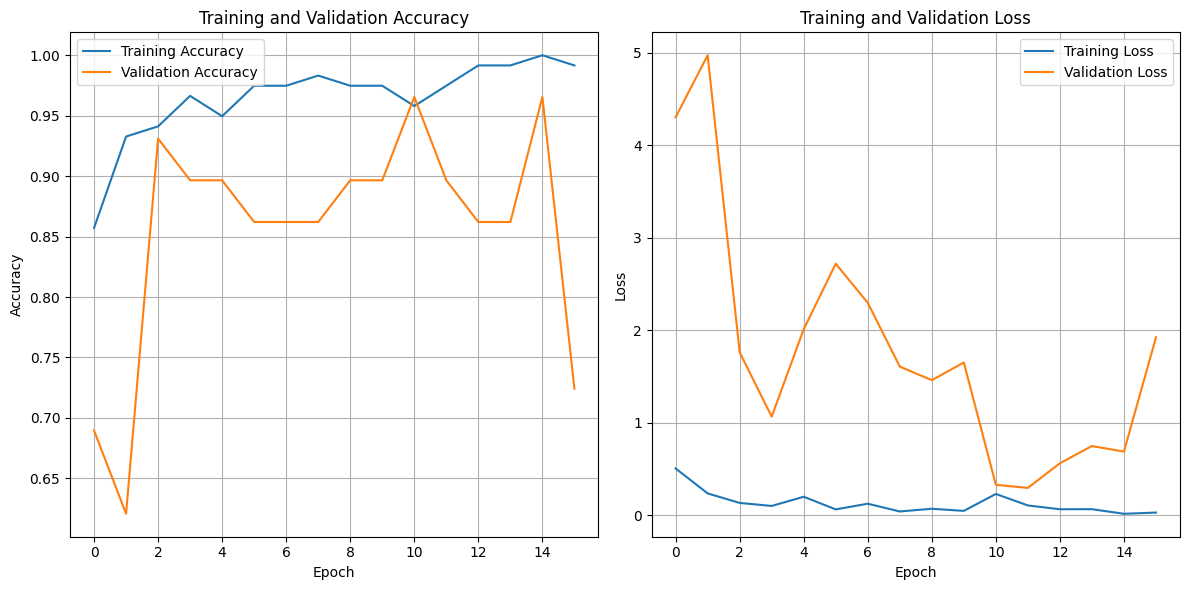

Epoch 1/16
8/8 [==============================] - 8s 129ms/step - loss: 0.1041 - accuracy: 0.9664 - val_loss: 0.7326 - val_accuracy: 0.9310
Epoch 2/16
8/8 [==============================] - 2s 95ms/step - loss: 0.0911 - accuracy: 0.9664 - val_loss: 13.1189 - val_accuracy: 0.3793
Epoch 3/16
8/8 [==============================] - 3s 135ms/step - loss: 0.1625 - accuracy: 0.9580 - val_loss: 1.2030 - val_accuracy: 0.9310
Epoch 4/16
8/8 [==============================] - 3s 130ms/step - loss: 0.1185 - accuracy: 0.9580 - val_loss: 1.0006 - val_accuracy: 0.9310
Epoch 5/16
8/8 [==============================] - 2s 132ms/step - loss: 0.0706 - accuracy: 0.9664 - val_loss: 1.4540 - val_accuracy: 0.8276
Epoch 6/16
8/8 [==============================] - 2s 99ms/step - loss: 0.0503 - accuracy: 0.9748 - val_loss: 1.7910 - val_accuracy: 0.6552
Epoch 7/16
8/8 [==============================] - 2s 96ms/step - loss: 0.0433 - accuracy: 0.9832 - val_loss: 1.1999 - val_accuracy: 0.8621
Epoch 8/16
8/8 [======

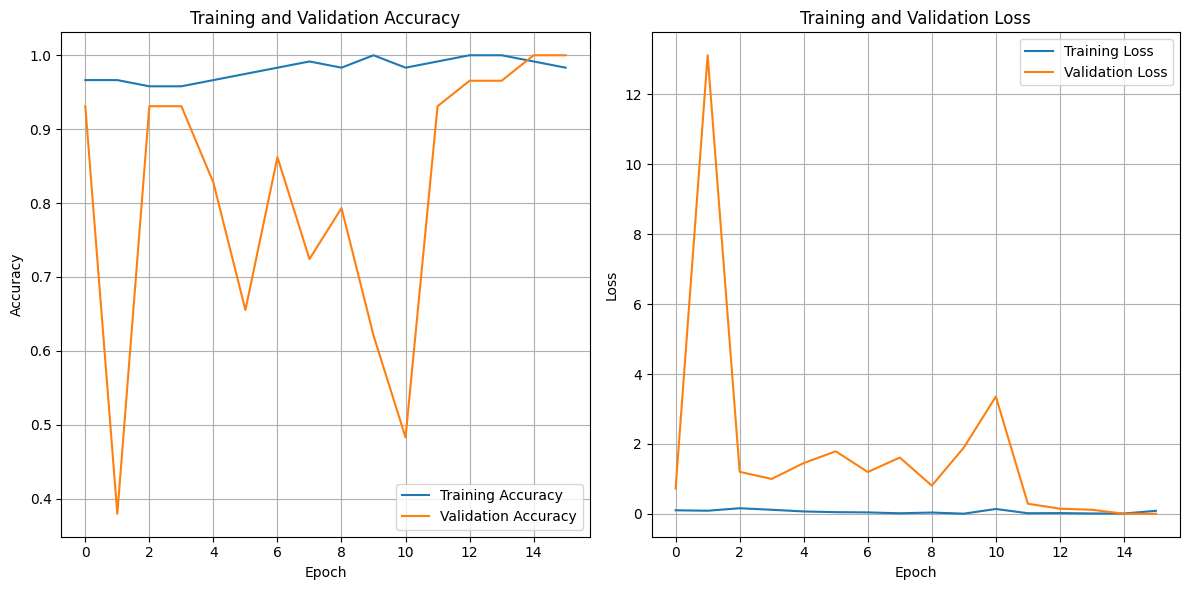

In [229]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import optimizers

def train_and_plot(model, train_dataset, validation_dataset, batch_size=16, epochs=16):
    opt = optimizers.Adam(learning_rate=0.006, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        train_dataset,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(validation_dataset)
    )

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.grid()
    plt.tight_layout()
    plt.show()

# Assuming you have the same model architecture for each transformation
# Train and plot for rotation
train_and_plot(model, rot_dataset, rot_validation_dataset)

# Train and plot for original data
train_and_plot(model,train_dataset, validation_dataset)

# Train and plot for flip
train_and_plot(model, flip_dataset,flip_validation_dataset)


2/2 [==============================] - 0s 11ms/step
Sensitivity: 0.7222222222222222
Specificity: 0.5454545454545454
Precision: 0.6551724137931034
Recall: 0.6551724137931034
F1 Score: 0.6551724137931034
AUC Score: 0.6338383838383839


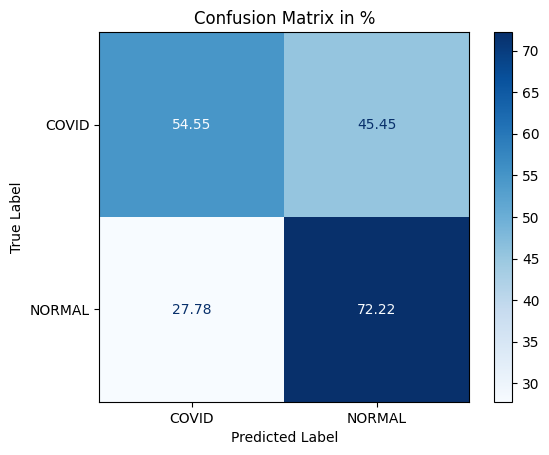

In [237]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Assuming you have a separate test_dataset
test_loss, test_accuracy = model.evaluate(test_dataset)

# Make predictions
y_pred = model.predict(test_dataset)
y_pred_new = np.round(y_pred)

# Get true labels and filenames
test_labels = []
for images, labels in test_dataset:
    test_labels.extend(labels.numpy())

test_labels = np.array(test_labels)

# Check if the number of samples match
if len(test_labels) != len(y_pred_new):
    raise ValueError("Number of samples in true labels and predictions do not match.")

# Calculate precision, recall, and F1 score
precision = precision_score(test_labels, y_pred_new, average='weighted')
recall = recall_score(test_labels, y_pred_new, average='weighted')
f1 = f1_score(test_labels, y_pred_new, average='weighted')

# Calculate AUC score
auc_score = roc_auc_score(test_labels, y_pred_new)

# Create confusion matrix
cm = confusion_matrix(test_labels, y_pred_new)

true_positive = cm[1, 1]
false_positive = cm[0, 1]
false_negative = cm[1, 0]
true_negative = cm[0, 0]

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('AUC Score:', auc_score)

cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Display confusion matrix
classes = test_dataset.class_names
cm_display = ConfusionMatrixDisplay(cm_percentage, display_labels=classes)
cm_display.plot(cmap='Blues', values_format=".2f")
plt.title('Confusion Matrix in %')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Due to the instability of the training process and overfittings, we have incorporated an L2 regularizer with α=0.01 into the network.

In [283]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Activation

model = Sequential()

# Convolutional Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization( ))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization( ))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Convolutional Block 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Convolutional Block 4
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Convolutional Block 5
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization( ))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Convolutional Block 6
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization( ))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Flatten())

# Dense Block 1
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization( ))
model.add(Activation('relu'))

# Dense Block 2
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(BatchNormalization( ))
model.add(Activation('relu'))

# Output Layer
model.add(Dense(1, activation='sigmoid', ))


model.summary()


Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_270 (Conv2D)         (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_270 (MaxPool  (None, 75, 75, 64)        0         
 ing2D)                                                          
                                                                 
 batch_normalization_360 (B  (None, 75, 75, 64)        256       
 atchNormalization)                                              
                                                                 
 activation_72 (Activation)  (None, 75, 75, 64)        0         
                                                                 
 dropout_270 (Dropout)       (None, 75, 75, 64)        0         
                                                                 
 conv2d_271 (Conv2D)         (None, 75, 75, 64)      

Epoch 1/17
23/23 [==============================] - 13s 239ms/step - loss: 3.2468 - accuracy: 0.6404 - val_loss: 917.9833 - val_accuracy: 0.4773 - lr: 0.0065
Epoch 2/17
23/23 [==============================] - 8s 226ms/step - loss: 1.8277 - accuracy: 0.7107 - val_loss: 38.3804 - val_accuracy: 0.5227 - lr: 0.0065
Epoch 3/17
23/23 [==============================] - 7s 261ms/step - loss: 1.2002 - accuracy: 0.7107 - val_loss: 9.7547 - val_accuracy: 0.5682 - lr: 0.0065
Epoch 4/17
23/23 [==============================] - 8s 276ms/step - loss: 0.8844 - accuracy: 0.7921 - val_loss: 5.3299 - val_accuracy: 0.5341 - lr: 0.0065
Epoch 5/17
23/23 [==============================] - 7s 223ms/step - loss: 0.8559 - accuracy: 0.7584 - val_loss: 15.3564 - val_accuracy: 0.4773 - lr: 0.0065
Epoch 6/17
23/23 [==============================] - 8s 273ms/step - loss: 0.7790 - accuracy: 0.7921 - val_loss: 1.1782 - val_accuracy: 0.6364 - lr: 0.0065
Epoch 7/17
23/23 [==============================] - 7s 225ms/step

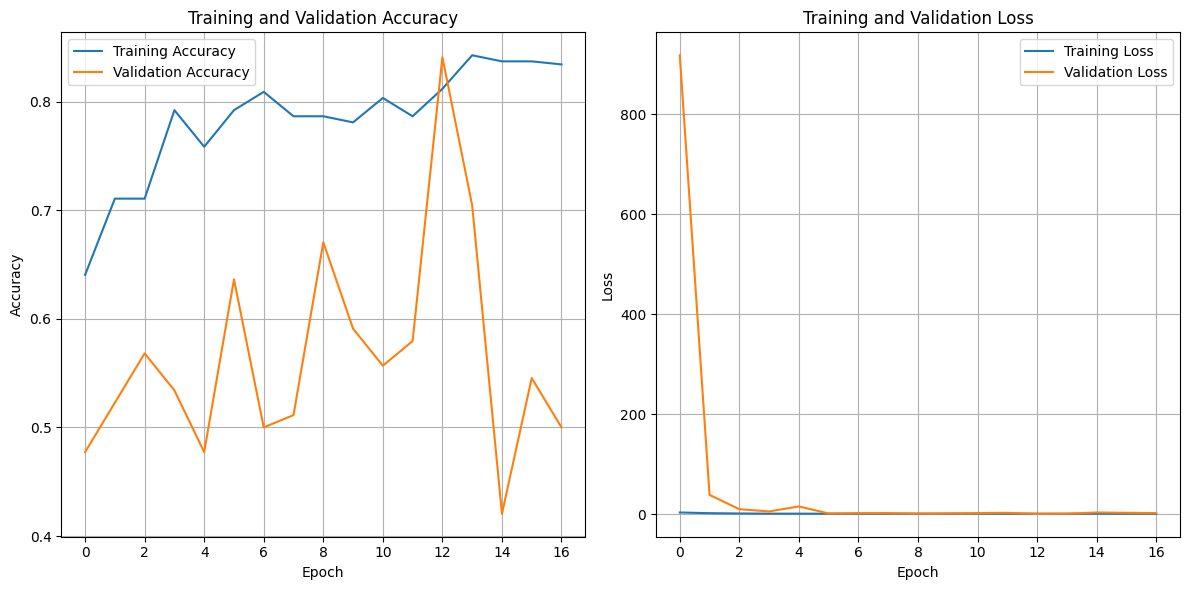

Epoch 1/17
8/8 [==============================] - 9s 160ms/step - loss: 1.1487 - accuracy: 0.6975 - val_loss: 1.6168 - val_accuracy: 0.3448 - lr: 0.0065
Epoch 2/17
8/8 [==============================] - 3s 114ms/step - loss: 0.7174 - accuracy: 0.8571 - val_loss: 2.3102 - val_accuracy: 0.5862 - lr: 0.0065
Epoch 3/17
8/8 [==============================] - 3s 131ms/step - loss: 0.6030 - accuracy: 0.9328 - val_loss: 8.4962 - val_accuracy: 0.5862 - lr: 0.0065
Epoch 4/17
8/8 [==============================] - 3s 133ms/step - loss: 0.5705 - accuracy: 0.8739 - val_loss: 1.3737 - val_accuracy: 0.6552 - lr: 0.0065
Epoch 5/17
8/8 [==============================] - 3s 114ms/step - loss: 0.5144 - accuracy: 0.9244 - val_loss: 0.6691 - val_accuracy: 0.7586 - lr: 0.0065
Epoch 6/17
8/8 [==============================] - 3s 112ms/step - loss: 0.4299 - accuracy: 0.9412 - val_loss: 0.7188 - val_accuracy: 0.7241 - lr: 0.0065
Epoch 7/17
8/8 [==============================] - 3s 113ms/step - loss: 0.4152 - a

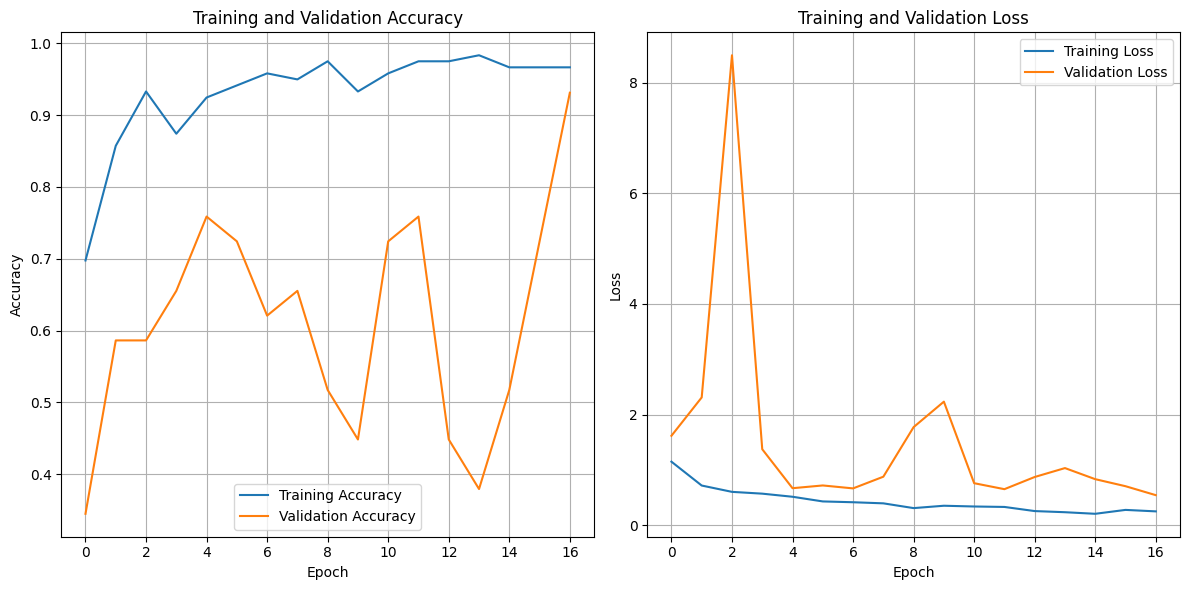

Epoch 1/17
8/8 [==============================] - 9s 146ms/step - loss: 0.8287 - accuracy: 0.8571 - val_loss: 1.1115 - val_accuracy: 0.3793 - lr: 0.0065
Epoch 2/17
8/8 [==============================] - 2s 105ms/step - loss: 0.6323 - accuracy: 0.8992 - val_loss: 1.2407 - val_accuracy: 0.3793 - lr: 0.0065
Epoch 3/17


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import optimizers

def train_and_plot(model, train_dataset, validation_dataset, batch_size=16, epochs=17):
    opt = optimizers.Adam(learning_rate=0.0065, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    from keras.callbacks import  ReduceLROnPlateau

    reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.95,
                              patience=3,
                              min_lr=0.0001, verbose=1)


    history = model.fit(
        train_dataset,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(validation_dataset),
        callbacks=[reduce_lr]
    )

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.grid()
    plt.tight_layout()
    plt.show()

# Assuming you have the same model architecture for each transformation
# Train and plot for rotation
train_and_plot(model, rot_dataset, rot_validation_dataset)

# Train and plot for original data
train_and_plot(model,train_dataset, validation_dataset)

# Train and plot for flip
train_and_plot(model, flip_dataset,flip_validation_dataset)


2/2 [==============================] - 0s 9ms/step
Sensitivity: 0.4444444444444444
Specificity: 0.8181818181818182
Precision: 0.6762250453720509
Recall: 0.5862068965517241
F1 Score: 0.5822660098522168
AUC Score: 0.6313131313131313


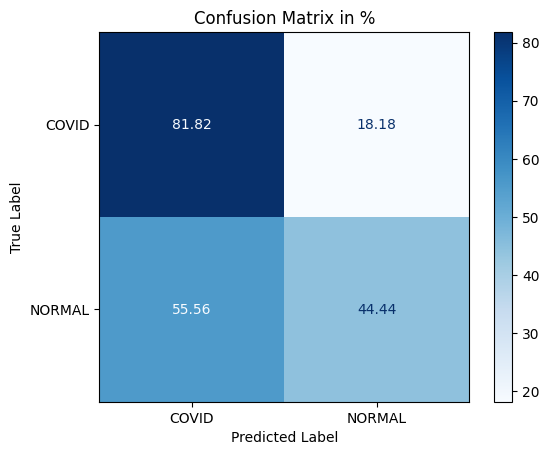

In [282]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Assuming you have a separate test_dataset
test_loss, test_accuracy = model.evaluate(test_dataset)

# Make predictions
y_pred = model.predict(test_dataset)
y_pred_new = np.round(y_pred)

# Get true labels and filenames
test_labels = []
for images, labels in test_dataset:
    test_labels.extend(labels.numpy())

test_labels = np.array(test_labels)

# Check if the number of samples match
if len(test_labels) != len(y_pred_new):
    raise ValueError("Number of samples in true labels and predictions do not match.")

# Calculate precision, recall, and F1 score
precision = precision_score(test_labels, y_pred_new, average='weighted')
recall = recall_score(test_labels, y_pred_new, average='weighted')
f1 = f1_score(test_labels, y_pred_new, average='weighted')

# Calculate AUC score
auc_score = roc_auc_score(test_labels, y_pred_new)

# Create confusion matrix
cm = confusion_matrix(test_labels, y_pred_new)

true_positive = cm[1, 1]
false_positive = cm[0, 1]
false_negative = cm[1, 0]
true_negative = cm[0, 0]

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('AUC Score:', auc_score)

cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Display confusion matrix
classes = test_dataset.class_names
cm_display = ConfusionMatrixDisplay(cm_percentage, display_labels=classes)
cm_display.plot(cmap='Blues', values_format=".2f")
plt.title('Confusion Matrix in %')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()